This notebook is used to perform an analysis of the gridsearch performed on the different models chosen to perform the binary classification problem.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Loading the Logistic Regression Results
LR_results = pd.read_csv('Logistic_Regression_GS_results.csv')

# Loading the Random Forest Results
RF_results = pd.read_csv('Random_Forest_GS_results.csv')

# Loading the SVM Results
SVM_results = pd.read_csv('Support_Vector_Machine_GS_results.csv')

# Loading the SVM Results with different polynomial degrees
SVM_results2 = pd.read_csv('Support_Vector_Machine_2_GS_results.csv')

# Loading the SVM Results with different polynomial degrees
XGB_results = pd.read_csv('XGBoost_GS_results.csv')


LR_results.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__C,param_classifier__penalty,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003001,0.000000,0.001491,4.912615e-04,6.7,l1,"{'classifier__C': 6.7, 'classifier__penalty': ...",0.797753,0.772472,0.785112,0.012640,1
1,0.003003,0.000002,0.001506,4.941225e-04,5.6,l1,"{'classifier__C': 5.6, 'classifier__penalty': ...",0.797753,0.769663,0.783708,0.014045,2
2,0.001995,0.000012,0.002006,1.000762e-03,5.6,l2,"{'classifier__C': 5.6, 'classifier__penalty': ...",0.797753,0.769663,0.783708,0.014045,2
3,0.002998,0.000010,0.001503,5.030632e-04,10.0,l1,"{'classifier__C': 10.0, 'classifier__penalty':...",0.797753,0.769663,0.783708,0.014045,2
4,0.002004,0.000003,0.002000,1.192093e-07,8.9,l2,"{'classifier__C': 8.9, 'classifier__penalty': ...",0.797753,0.769663,0.783708,0.014045,2


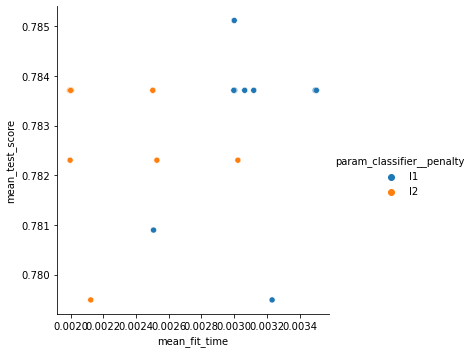

<Figure size 432x288 with 0 Axes>

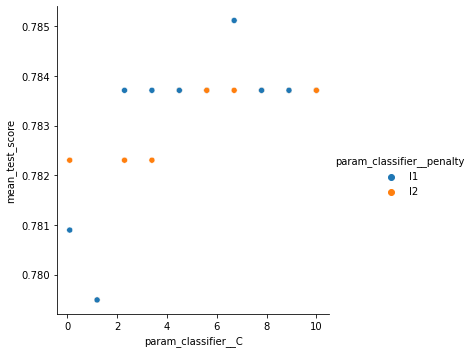

In [3]:
# Plotting the time to fit the model vs the accuracy for the logistic regression model.

sns.relplot(x = 'mean_fit_time', y = 'mean_test_score', kind = 'scatter', hue = 'param_classifier__penalty', data = LR_results)

plt.figure()
sns.relplot(x = 'param_classifier__C', y = 'mean_test_score', kind = 'scatter', hue = 'param_classifier__penalty', data = LR_results)

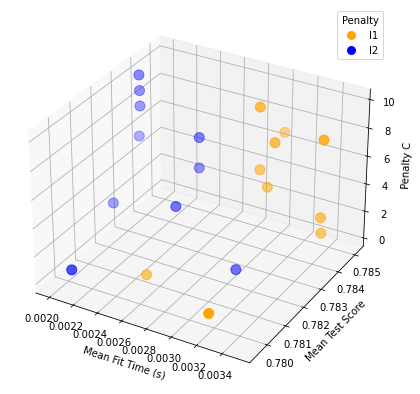

In [4]:
# Trying to implement 3d plots looking at how the C normalization parameter influences the mean test score.

from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px

colors = {'l1': 'orange', 'l2': 'blue'}

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    LR_results['mean_fit_time'],
    LR_results['mean_test_score'],
    LR_results['param_classifier__C'],
    c=LR_results['param_classifier__penalty'].map(colors),
    s=100  # Size of points
)

# Set labels
ax.set_xlabel('Mean Fit Time (s)')
ax.set_ylabel('Mean Test Score')
ax.set_zlabel('Penalty C')

legend_labels = list(colors.keys())
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[label], markersize=10) for label in legend_labels]
ax.legend(handles, legend_labels, title='Penalty')

plt.show()

In [5]:
fig = px.scatter_3d(
    LR_results,
    x='mean_fit_time',
    y='param_classifier__C',
    z='mean_test_score',
    color='param_classifier__penalty',
    title='3D Scatter Plot of Mean Fit Time vs Mean Test Score',
    labels={
        'mean_fit_time': 'Mean Fit Time (s)',
        'mean_test_score': 'Mean Test Score',
        'param_classifier__C': 'Penalty C'
    },
    color_discrete_map={'l1': 'orange', 'l2': 'blue'},  # Define colors for each penalty
)

# Update layout for better visualization
fig.update_traces(marker=dict(size=5))  # Adjust marker size
fig.update_layout(scene=dict(
    xaxis_title='Mean Fit Time (s)',
    yaxis_title='Penalty C',
    zaxis_title='Mean Test Score',
))

# Show the plot
fig.show()

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.118033      0.001993         0.007000    3.576279e-07   
1       0.137592      0.003456         0.010494    1.495242e-03   
2       0.135682      0.003363         0.007000    1.000285e-03   
3       0.141510      0.011916         0.006534    5.325079e-04   
4       0.136513      0.013503         0.008511    5.108118e-04   

   param_classifier__n_estimators                             params  \
0                             112  {'classifier__n_estimators': 112}   
1                             113  {'classifier__n_estimators': 113}   
2                             114  {'classifier__n_estimators': 114}   
3                             115  {'classifier__n_estimators': 115}   
4                             119  {'classifier__n_estimators': 119}   

   split0_test_score  split1_test_score  mean_test_score  std_test_score  \
0           0.828652           0.792135         0.810393        0.018258   
1           

" fig = px.scatter_3d(\n    RF_results,\n    x='param_classifier__max_depth',\n    y='param_classifier__n_estimators',\n    z='mean_test_score',\n    #color='mean_fit_time',\n    title='3D Scatter Plot of RF Gridsearch',\n    labels={\n        'param_classifier__max_depth': 'Max Depth',\n        'param_classifier__n_estimators': 'N Estimators',\n        'mean_test_score': 'Accuracy'\n    },\n    color_discrete_map={'l1': 'orange', 'l2': 'blue'},  # Define colors for each penalty\n)\n\n# Update layout for better visualization\nfig.update_traces(marker=dict(size=5))  # Adjust marker size\nfig.update_layout(scene=dict(\n    xaxis_title='param_classifier__max_depth',\n    yaxis_title='param_classifier__n_estimators',\n    zaxis_title='mean_test_score',\n))\n\n# Show the plot\nfig.show() "

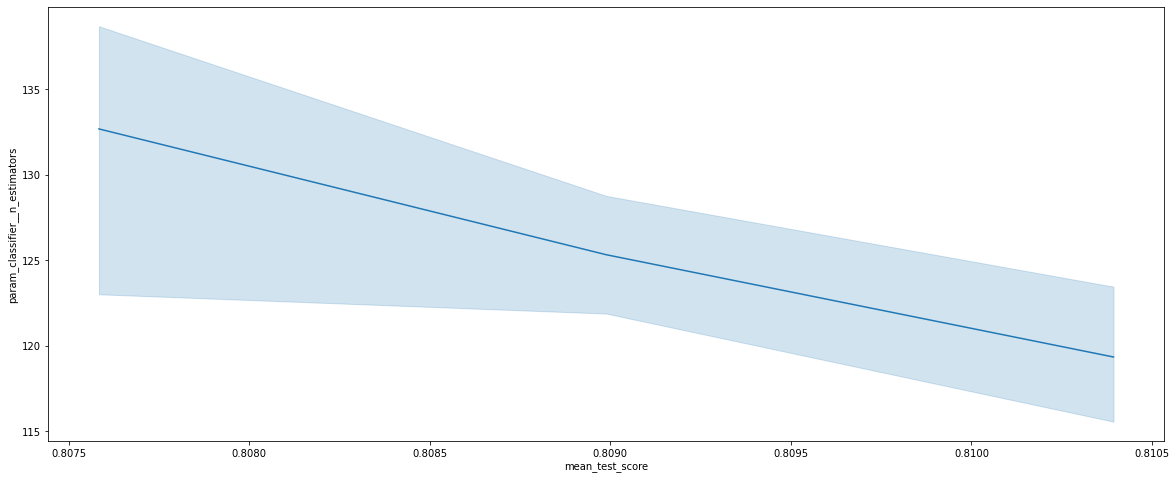

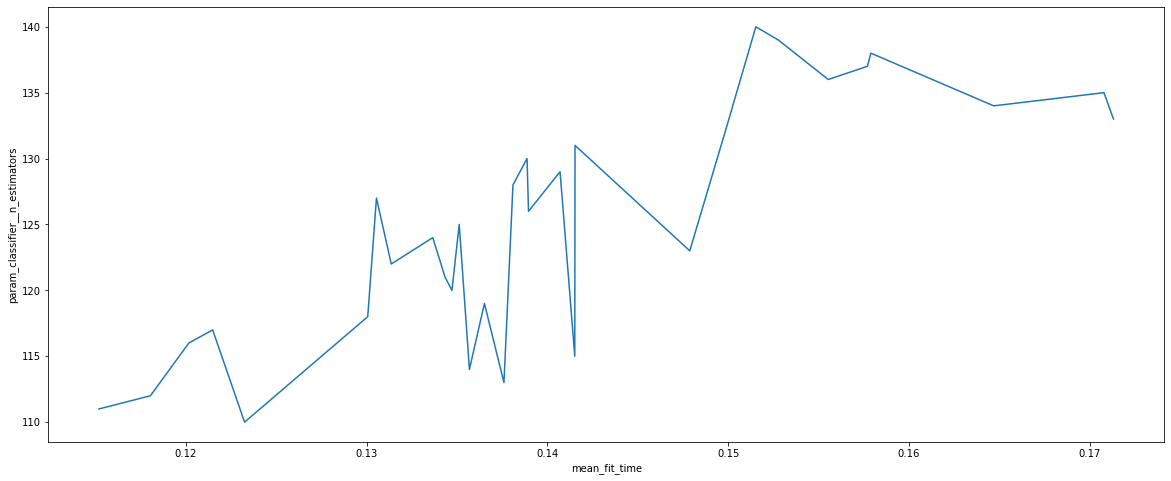

In [6]:
# Analysing the results of the Random Forest algorithm by analysing n_estimators and depth vs accuracy and then running time

print(RF_results.head())
plt.figure(figsize = (20,8))


#sns.lineplot(x = 'mean_test_score', y = 'param_classifier__max_depth', data = RF_results)

#plt.figure()
sns.lineplot(x = 'mean_test_score', y = 'param_classifier__n_estimators', data = RF_results)

plt.figure(figsize=(20,8))
sns.lineplot(x = 'mean_fit_time', y = 'param_classifier__n_estimators', data = RF_results)


# Normalizing the plots to plot accuracy gain vs time gain

""" fig = px.scatter_3d(
    RF_results,
    x='param_classifier__max_depth',
    y='param_classifier__n_estimators',
    z='mean_test_score',
    #color='mean_fit_time',
    title='3D Scatter Plot of RF Gridsearch',
    labels={
        'param_classifier__max_depth': 'Max Depth',
        'param_classifier__n_estimators': 'N Estimators',
        'mean_test_score': 'Accuracy'
    },
    color_discrete_map={'l1': 'orange', 'l2': 'blue'},  # Define colors for each penalty
)

# Update layout for better visualization
fig.update_traces(marker=dict(size=5))  # Adjust marker size
fig.update_layout(scene=dict(
    xaxis_title='param_classifier__max_depth',
    yaxis_title='param_classifier__n_estimators',
    zaxis_title='mean_test_score',
))

# Show the plot
fig.show() """


Looking at the results obtained here, the gridsearch has shown that the optimal depth of the tree is around 5 whilst the optimal number of estimators in terms of accuracy is 118. Looking at it from a fit time vs accuracy trade off we can conclude that .....

Now visualising the gridsearch results for the SVM model using two types of classifying boundaries and multiple regularisation parameters. Looking at this plot, it 

<AxesSubplot:xlabel='mean_test_score', ylabel='param_classifier__C'>

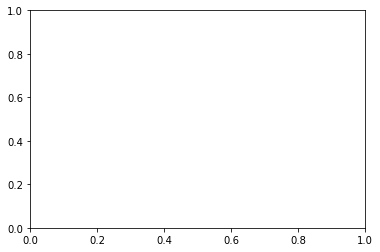

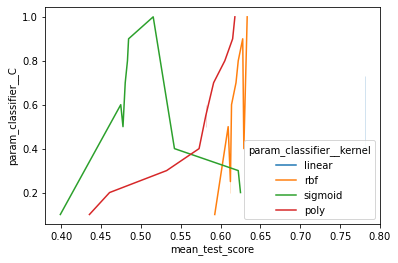

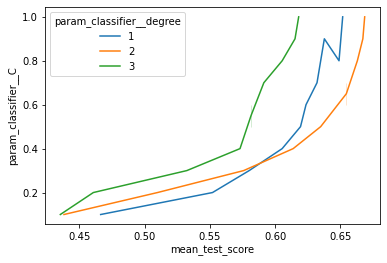

In [7]:
plt.subplot()

plt.figure()
sns.lineplot(x = 'mean_test_score', y = 'param_classifier__C', hue = 'param_classifier__kernel', data = SVM_results)


plt.figure()
sns.lineplot(x = 'mean_test_score', y = 'param_classifier__C', hue = 'param_classifier__degree', data = SVM_results2, palette = "tab10")

(0.8047752808988764, 0.8260112359550562)

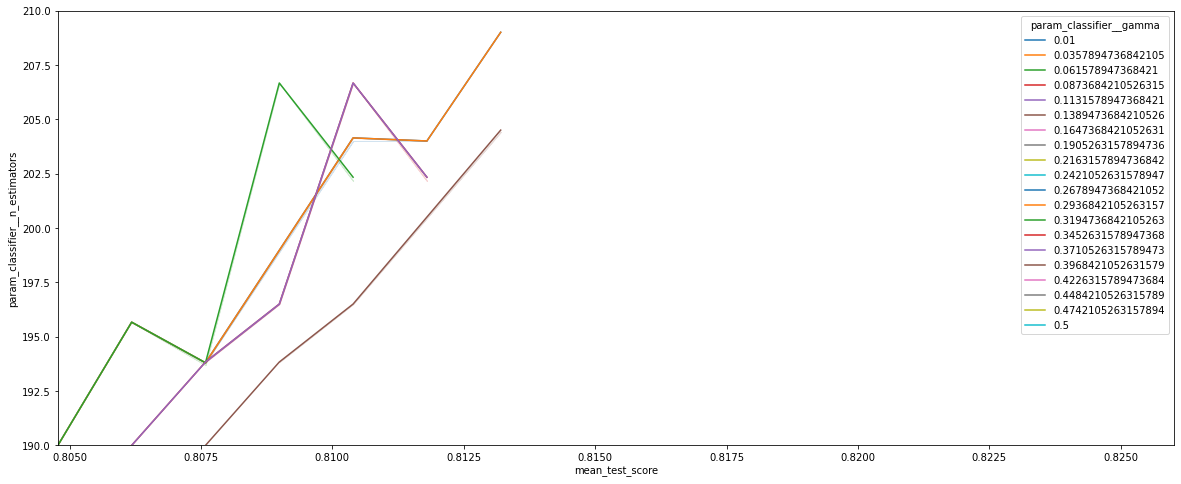

In [ ]:
# Plotting the results obtained from the gridsearch of the XGBoost algorithm


plt.figure(figsize=(20,8))
sns.lineplot(x = 'mean_test_score', y = 'param_classifier__n_estimators', hue = 'param_classifier__gamma', data = XGB_results, palette = "tab10", ci = False)
#hue = 'param_classifier__gamma'
plt.ylim(190,210)
plt.xlim(min(XGB_results['mean_test_score']), max(XGB_results['mean_test_score'])+0.01)